In [1]:
import pandas as pd
import numpy as np


# Prerpocessing

Need categorical columns One-Hot encoded

In [74]:
raw_data = pd.read_csv("./data/E-Mail_Analytics.csv")
raw_data

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0
2,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0
3,9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0
4,2,1) $0 - $100,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
63995,10,2) $100 - $200,105.54,1,0,Urban,0,Web,Mens E-Mail,0,0,0.0
63996,5,1) $0 - $100,38.91,0,1,Urban,1,Phone,Mens E-Mail,0,0,0.0
63997,6,1) $0 - $100,29.99,1,0,Urban,1,Phone,Mens E-Mail,0,0,0.0
63998,1,5) $500 - $750,552.94,1,0,Surburban,1,Multichannel,Womens E-Mail,0,0,0.0


In [75]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   recency          64000 non-null  int64  
 1   history_segment  64000 non-null  object 
 2   history          64000 non-null  float64
 3   mens             64000 non-null  int64  
 4   womens           64000 non-null  int64  
 5   zip_code         64000 non-null  object 
 6   newbie           64000 non-null  int64  
 7   channel          64000 non-null  object 
 8   segment          64000 non-null  object 
 9   visit            64000 non-null  int64  
 10  conversion       64000 non-null  int64  
 11  spend            64000 non-null  float64
dtypes: float64(2), int64(6), object(4)
memory usage: 5.9+ MB


In [76]:
raw_data['segment'].unique()

array(['Womens E-Mail', 'No E-Mail', 'Mens E-Mail'], dtype=object)

In [77]:
raw_data.groupby('conversion').size()

conversion
0    63422
1      578
dtype: int64

In [78]:
raw_data[raw_data['conversion']==1].groupby('history_segment').size()

history_segment
1) $0 - $100        164
2) $100 - $200       99
3) $200 - $350      117
4) $350 - $500       86
5) $500 - $750       57
6) $750 - $1,000     27
7) $1,000 +          28
dtype: int64

In [79]:
raw_data[raw_data['conversion']==1].groupby('channel').size()

channel
Multichannel     98
Phone           217
Web             263
dtype: int64

In [80]:
from sklearn.model_selection import train_test_split

stratified_sample, _ = train_test_split(raw_data[raw_data['conversion']==0], test_size=0.99, stratify=raw_data[raw_data['conversion']==0][['history_segment', 'mens', 'womens', 'newbie', 'channel', 'segment']])

In [81]:
stratified_sample.shape

In [82]:
stratified_sample.groupby('history_segment').size()

history_segment
1) $0 - $100        228
2) $100 - $200      139
3) $200 - $350      117
4) $350 - $500       63
5) $500 - $750       50
6) $750 - $1,000     25
7) $1,000 +          12
dtype: int64

In [83]:
sum(stratified_sample['spend'])

In [84]:
new_dataset = pd.concat([raw_data[raw_data['conversion']==1], stratified_sample], axis=0)
new_dataset.shape

# new_dataset.to_csv('./data/sampled_email.csv', index=False)

In [85]:
# data = pd.get_dummies(raw_data)
data = new_dataset #raw_data
data

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend
217,10,1) $0 - $100,88.37,0,1,Urban,0,Phone,Womens E-Mail,1,1,29.99
267,4,3) $200 - $350,297.80,1,1,Urban,0,Phone,Womens E-Mail,1,1,264.66
332,10,1) $0 - $100,29.99,0,1,Surburban,0,Web,No E-Mail,1,1,149.28
451,6,3) $200 - $350,265.61,0,1,Surburban,1,Multichannel,Womens E-Mail,1,1,42.66
459,1,2) $100 - $200,101.99,0,1,Surburban,0,Web,Womens E-Mail,1,1,29.99
...,...,...,...,...,...,...,...,...,...,...,...,...
23010,4,2) $100 - $200,147.43,1,0,Surburban,0,Web,No E-Mail,1,0,0.00
34739,1,"7) $1,000 +",1454.80,1,1,Rural,1,Multichannel,Womens E-Mail,1,0,0.00
24120,10,1) $0 - $100,29.99,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.00
20318,2,4) $350 - $500,393.81,1,0,Surburban,1,Multichannel,Mens E-Mail,1,0,0.00


In [86]:
treatment = 'segment'
pd.Categorical(data[treatment], {'No E-Mail':0, 'Mens E-Mail':1, 'Womens E-Mail':2})

['Womens E-Mail', 'Womens E-Mail', 'No E-Mail', 'Womens E-Mail', 'Womens E-Mail', ..., 'No E-Mail', 'Womens E-Mail', 'Womens E-Mail', 'Mens E-Mail', 'Womens E-Mail']
Length: 1212
Categories (3, object): ['No E-Mail', 'Mens E-Mail', 'Womens E-Mail']

In [87]:
# # Make Categorical

# cols = list(data.columns)

# for col_name in cols:
#     if data[col_name].dtype == object:
#         data[col_name] = data[col_name].astype('category')
        
# data.head()

In [88]:
data.dtypes

recency              int64
history_segment     object
history            float64
mens                 int64
womens               int64
zip_code            object
newbie               int64
channel             object
segment             object
visit                int64
conversion           int64
spend              float64
dtype: object

In [89]:
all_categories = {}
treatment = 'segment'

cols = list(data.columns)
cols.remove(treatment)

for col_name in cols:
    # print(data[col_name].dtype)
    if data[col_name].dtype == object:
        new_col = data[col_name].astype('category')
        all_categories[col_name] = dict(enumerate(new_col.cat.categories))
        data[col_name] = new_col.cat.codes
        # Now convert the numbers into categorical
        data[col_name] = data[col_name].astype('category')


# Deal with treatment column separately
data[treatment] = pd.Categorical(data[treatment], ['No E-Mail', 'Mens E-Mail', 'Womens E-Mail'])
all_categories[treatment] = dict(enumerate(data[treatment].cat.categories))
data[treatment] = data[treatment].cat.codes
data[treatment] = data[treatment].astype('category')

data.head()

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend
217,10,0,88.37,0,1,2,0,1,2,1,1,29.99
267,4,2,297.80,1,1,2,0,1,2,1,1,264.66
332,10,0,29.99,0,1,1,0,2,0,1,1,149.28
451,6,2,265.61,0,1,1,1,0,2,1,1,42.66
459,1,1,101.99,0,1,1,0,2,2,1,1,29.99


In [90]:
all_categories

{'history_segment': {0: '1) $0 - $100',
  1: '2) $100 - $200',
  2: '3) $200 - $350',
  3: '4) $350 - $500',
  4: '5) $500 - $750',
  5: '6) $750 - $1,000',
  6: '7) $1,000 +'},
 'zip_code': {0: 'Rural', 1: 'Surburban', 2: 'Urban'},
 'channel': {0: 'Multichannel', 1: 'Phone', 2: 'Web'},
 'segment': {0: 'No E-Mail', 1: 'Mens E-Mail', 2: 'Womens E-Mail'}}

In [91]:
data.dtypes

recency               int64
history_segment    category
history             float64
mens                  int64
womens                int64
zip_code           category
newbie                int64
channel            category
segment            category
visit                 int64
conversion            int64
spend               float64
dtype: object

In [72]:
data.shape

In [20]:
data['segment'].cat.codes

0        2
1        0
2        2
3        1
4        2
        ..
63995    1
63996    1
63997    1
63998    2
63999    1
Length: 64000, dtype: int8

In [ ]:
import causallearn
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.cit import kci

# cg = pc(data.to_numpy(), indep_test='kci') # 'kci': indepdendence test when variables are both discrete and continuous

cg = pc(data.to_numpy(), 0.05, kci, kernelZ='Polynomial', approx=False, est_width='median', verbose=True)

#appioxi=false


In [ ]:
cg

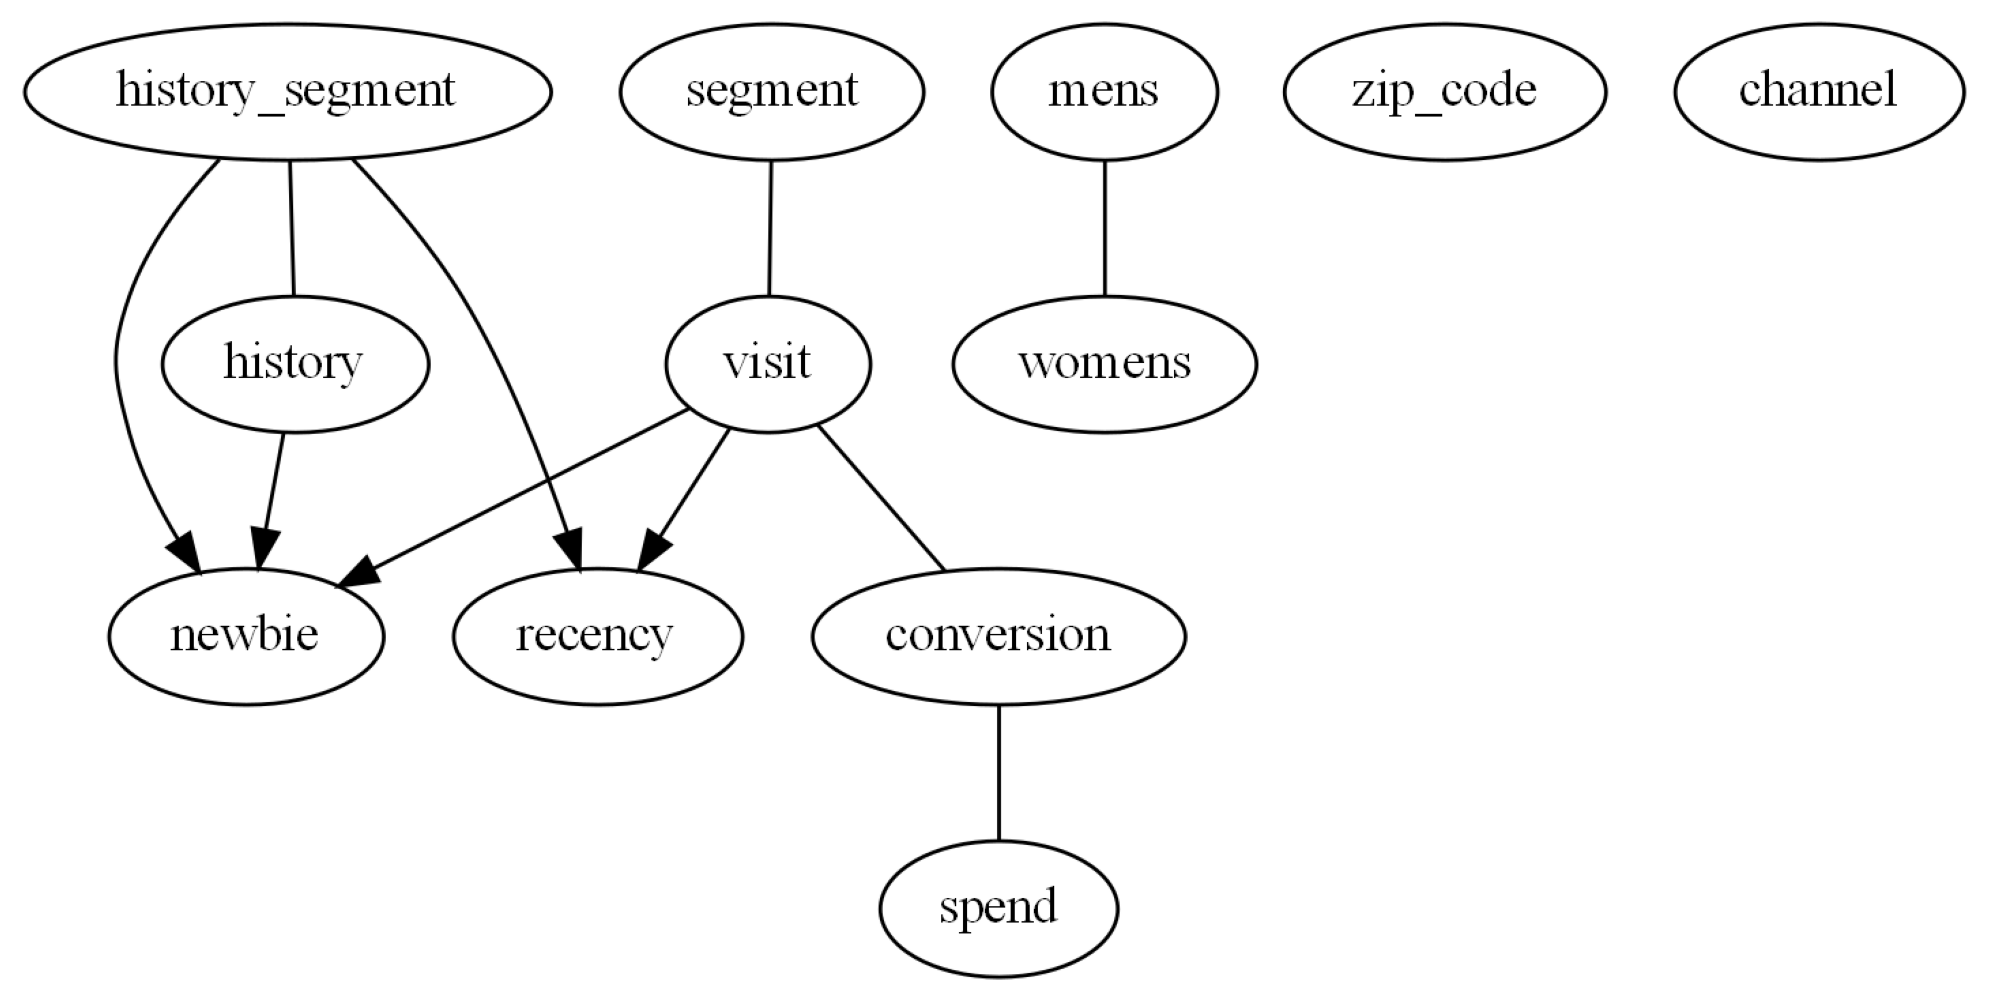

In [94]:
cg.draw_pydot_graph(labels=data.columns)

In [49]:
raw_data.to_numpy()

array([[10, '2) $100 - $200', 142.44, ..., 0, 0, 0.0],
       [6, '3) $200 - $350', 329.08, ..., 0, 0, 0.0],
       [7, '2) $100 - $200', 180.65, ..., 0, 0, 0.0],
       ...,
       [6, '1) $0 - $100', 29.99, ..., 0, 0, 0.0],
       [1, '5) $500 - $750', 552.94, ..., 0, 0, 0.0],
       [1, '4) $350 - $500', 472.82, ..., 0, 0, 0.0]], dtype=object)

# FCI

In [ ]:
from causallearn.search.ConstraintBased.FCI import fci

# cg_fci, edges = fci(data.to_numpy(), independence_test_method='kci')

cg_fci, edges = fci(data.to_numpy(), independence_test_method=kci, alpha=0.05, approx=False, verbose=True)

In [53]:
pd.isnull(raw_data.to_numpy()).any()

False

In [39]:
cg_fci

In [96]:
# To display pydot graph
from IPython.display import Image, display
from causallearn.utils.GraphUtils import GraphUtils

def draw_general_graph(gen_graph, labels):
    pyd = GraphUtils.to_pydot(gen_graph, labels=labels)
    plt = Image(pyd.create_png())
    display(plt)


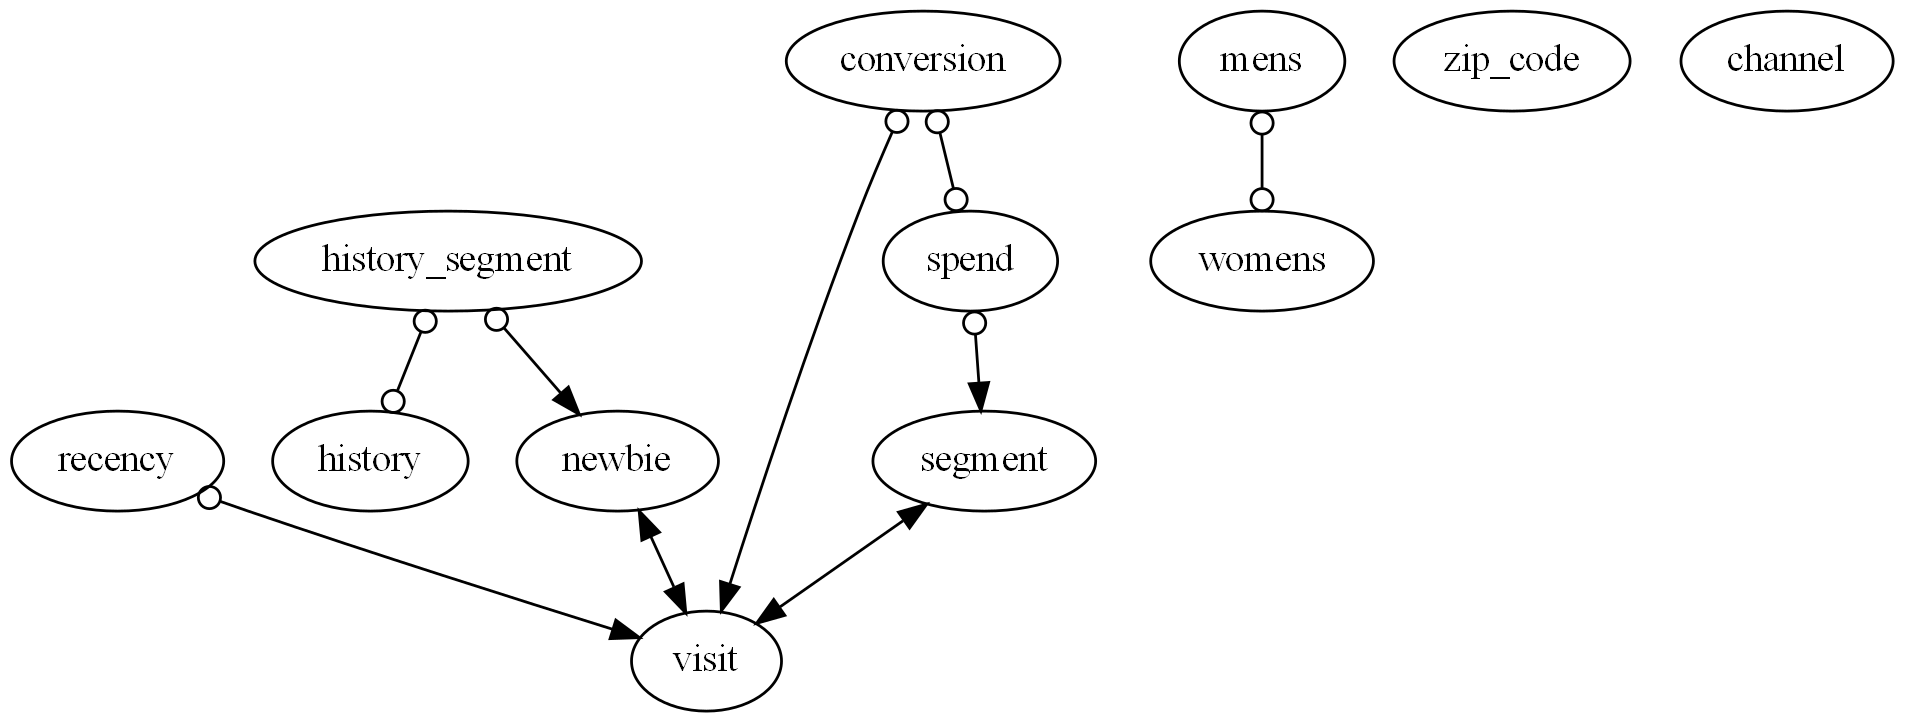

In [97]:
draw_general_graph(cg_fci, labels=data.columns)

# LiNGAM

In [29]:
from causallearn.search.FCMBased import lingam
model_lingam = lingam.ICALiNGAM()
model_lingam.fit(data)


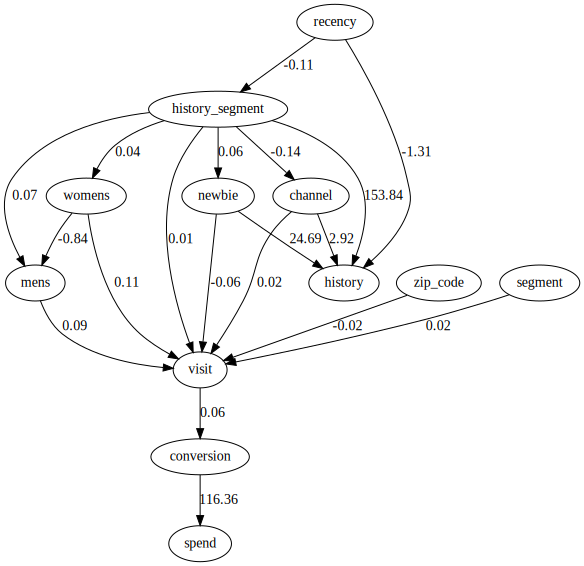

In [30]:

from causallearn.search.FCMBased.lingam.utils import make_dot
make_dot(model_lingam.adjacency_matrix_, labels=list(data.columns))

In [31]:
model_lingam._adjacency_matrix.shape

(12, 12)

In [32]:
# To add/remove edge, we can 

In [33]:
import graphviz

def make_graph(adjacency_matrix, labels=None):
    idx = np.abs(adjacency_matrix) > 0.01
    dirs = np.where(idx)
    d = graphviz.Digraph(engine='dot')
    names = labels if labels else [f'x{i}' for i in range(len(adjacency_matrix))]
    for name in names:
        d.node(name)
    for to, from_, coef in zip(dirs[0], dirs[1], adjacency_matrix[idx]):
        d.edge(names[from_], names[to], label=str(coef))
    return d

def str_to_dot(string):
    '''
    Converts input string from graphviz library to valid DOT graph format.
    '''
    graph = string.strip().replace('\n', ';').replace('\t','')
    graph = graph[:9] + graph[10:-2] + graph[-1] # Removing unnecessary characters from string
    return graph

In [35]:
graph_dot = make_graph(model_lingam.adjacency_matrix_, labels=list(data.columns))


In [36]:
import dowhy

# Define Causal Model
model_est=dowhy.CausalModel(
        data = data,
        treatment='segment',
        outcome='spend',
        graph=str_to_dot(graph_dot.source))

# Identification
identified_estimand = model_est.identify_effect(proceed_when_unidentifiable=False)
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d               
──────────(E[spend])
d[segment]          
Estimand assumption 1, Unconfoundedness: If U→{segment} and U→spend then P(spend|segment,,U) = P(spend|segment,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
Estimand expression:
 ⎡      d                  d                   ⎤
E⎢─────────────(spend)⋅──────────([conversion])⎥
 ⎣d[conversion]        d[segment]              ⎦
Estimand assumption 1, Full-mediation: conversion intercepts (blocks) all directed paths from segment to s,p,e,n,d.
Estimand assumption 2, First-stage-unconfoundedness: If U→{segment} and U→{conversion} then P(conversion|segment,U) = P(conversion|segment)
Estimand assumption 3, Second-stage-unconfoundedness: If U→{conversion} and U→spend then P(spend|conversion, segment, U) = P(spend|conversion, segment)



In [ ]:
# Estimation
estimate = model_est.estimate_effect(identified_estimand,
                                method_name="backdoor.linear_regression",
                                control_value=0,
                                treatment_value=1,
                                confidence_intervals=True,
                                test_significance=True)
print("Causal Estimate is " + str(estimate.value))

In [38]:
print("Causal Estimate is " + str(estimate.value))

Causal Estimate is 0.7663064819378391


In [ ]:
# Estimation
estimate = model_est.estimate_effect(identified_estimand,
                                method_name="backdoor.linear_regression",
                                control_value=0,
                                treatment_value=2,
                                confidence_intervals=True,
                                test_significance=True)
print("Causal Estimate is " + str(estimate.value))

In [40]:
print("Causal Estimate is " + str(estimate.value))

Causal Estimate is 0.42971558857012115


In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.ensemble import GradientBoostingRegressor
dml_estimate = model_est.estimate_effect(identified_estimand, method_name="backdoor.econml.dml.DML",
                                control_value = 0,
                                treatment_value = 1,
                                confidence_intervals=False,
                                method_params={"init_params":{
                                    'model_y':GradientBoostingRegressor(),
                                    'model_t': GradientBoostingRegressor(),
                                    "model_final":LassoCV(fit_intercept=False), 
                                    'featurizer':PolynomialFeatures(degree=1, include_bias=False)},
                                "fit_params":{}})
print(dml_estimate)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d               
──────────(E[spend])
d[segment]          
Estimand assumption 1, Unconfoundedness: If U→{segment} and U→spend then P(spend|segment,,U) = P(spend|segment,)

## Realized estimand
b: spend~segment | zip_code,recency,channel,history_segment,womens,mens,newbie
Target units: ate

## Estimate
Mean value: 0.18712599979708341
Effect estimates: [0.03197676 0.11426371 0.32716319 ... 0.36477863 0.21893708 0.08294747]



In [45]:
causal_estimate_match = model_est.estimate_effect(identified_estimand,
                                              method_name="backdoor.propensity_score_matching",
                                              target_units="atc")
print(causal_estimate_match)
print("Causal Estimate is " + str(causal_estimate_match.value))

propensity_score_matching


Exception: Propensity score methods are applicable only for binary treatments